1D5220 : Biomedical imaging and sensing

Author ID: 230011982

# Objectives:
1. CNN model for Pneumonia classification


2. Fly-through video showing images in the test directory


## Task 1 outline:
- Data importation and exploration.

- Data preprocessing and standardization.

- Input pipeline

- CNN model & compilation. 

- Model Metrics: Confusion matrix and classification report.

- Image illustration. 

## Task 2 outline
- Defining the function for the images. 

- Creating the video using loops. 

NB: The total estimates run time for this script is 4h 

In [1]:
#Import reguired libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing, layers, Model, backend
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Activation, Add, MaxPooling2D, Conv2D, Flatten, BatchNormalization, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.preprocessing.image import  load_img
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from mlxtend.plotting import plot_confusion_matrix
import gc #Garbage collector to manage memory 
from sklearn.utils import shuffle
from sklearn import metrics
import os
import cv2
import warnings
from PIL import Image
#Supress warnings
warnings.filterwarnings('ignore')
#Set seed for reproducibility
np.random.seed(111)

# Set the random seed in tensorflow for reproducibility
tf.random.set_seed(111)
from random import seed
seed(111)

In [2]:
print(tf.__version__)

2.16.1


In [3]:
##################

# Data importation and exploration

- Obtain the files into my working directory.

- Examine the distribution of the dataset within main folders i.e Train, test and validation set.

- Examine the distribution of the dataset within subfolders i.e Pneumonia and normal.


Note: Data importation, exploration and input pipeline has been inspired by Tensorflow: https://www.tensorflow.org/tutorials/images/classification 

Findings: The dataset is imbalanced, as Total_NORMAL=1585 while Total_PNEUMONIA=4275

In [4]:
#Obtaining the files into the directory

#Getting the path to the dataset "chest_xrays"
base_dir = os.path.abspath("chest_xray") 

train_dir = os.path.join(base_dir, 'train') #Getting the path for the training data 
validation_dir = os.path.join(base_dir, 'val') #Getting the path for the validation data 
test_dir = os.path.join(base_dir, 'test')  #Getting the path for the test data 

In [5]:
#Examine the distribution of normal CXR in all datasets

# Training set
#Obtaining sub-directory for training data with normal Xrays
train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
#Getting the list of filenames for NORMAL images in the training set
train_NORMAL_fnames = os.listdir(train_NORMAL_dir) 
#Storing the total number of normal images in train directory to this variable
n_train_NORMAL = len(train_NORMAL_fnames)

#Validation set
#Obtaining sub-directory for validation data with normal Xrays
validation_NORMAL_dir = os.path.join(validation_dir, 'NORMAL')
#Getting the list of filenames for NORMAL images in the validation set
validation_NORMAL_fnames = os.listdir(validation_NORMAL_dir) 
#Storing the total number of normal images in validation directory to this variable
n_val_NORMAL = len(validation_NORMAL_fnames)

# Test Set
#Obtaining sub-directory for test data with normal Xrays
test_NORMAL_dir = os.path.join(test_dir, 'NORMAL')
#Getting the list of filenames for NORMAL images in the test set
test_NORMAL_fnames = os.listdir(test_NORMAL_dir) 
#Storing the total number of normal images in test directory to this variable
n_test_NORMAL = len(test_NORMAL_fnames)

print('The training set has', n_train_NORMAL, 'normal images')
print('The validation set has', n_val_NORMAL, 'normal images')
print('The test set has', n_test_NORMAL, 'normal images')

#To calculate the total number of Normal images in the dataset: 
n_NORMAL = n_train_NORMAL + n_val_NORMAL + n_test_NORMAL 
print('The dataset has a total of', n_NORMAL, 'normal images')

The training set has 1216 normal images
The validation set has 135 normal images
The test set has 234 normal images
The dataset has a total of 1585 normal images


In [6]:
#Examining the distribution of pneumonia chext x-ray images in all datasets

# Training set
#Obtaining sub-directory for training data with Pneumonia Xrays
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA') 
#Getting the list of filenames for PNEUMONIA images in the training set
train_PNEUMONIA_fnames = os.listdir(train_PNEUMONIA_dir)
#Storing the total number of PNEUMONIA images in train directory to this variable
n_train_PNEUMONIA = len(train_PNEUMONIA_fnames)

#Validation set
#Obtaining sub-directory for validation data with Xrays exhibiting Pneumonia
validation_PNEUMONIA_dir = os.path.join(validation_dir, 'PNEUMONIA')
#Getting the list of filenames for PNEUMONIA images in the validation set
validation_PNEUMONIA_fnames = os.listdir(validation_PNEUMONIA_dir) 
#Storing the total number of PNEUMONIA images in validation directory to this variable
n_val_PNEUMONIA = len(validation_PNEUMONIA_fnames)

# Test set
#Obtaining sub-directory for test data with Xrays exhibiting Pneumonia
test_PNEUMONIA_dir = os.path.join(test_dir, 'PNEUMONIA')
#Getting the list of filenames for PNEUMONIA images in the test set
test_PNEUMONIA_fnames = os.listdir(test_PNEUMONIA_dir) 
#Storing the total number of PNEUMONIA images in test directory to this variable
n_test_PNEUMONIA = len(test_PNEUMONIA_fnames)


print('The training set has', n_train_PNEUMONIA, 'Pneumonia CXR images')
print('The validation set has', n_val_PNEUMONIA, 'Pneumonia CXR images')
print('The test set has', n_test_PNEUMONIA, 'Pneumonia CXR images')


#To calculate the total number of Normal images in the dataset: 
n_PNEUMONIA = n_train_PNEUMONIA + n_val_PNEUMONIA + n_test_PNEUMONIA 
print('The dataset has a total of', n_PNEUMONIA, 'Pneumonia CXR images')

The training set has 3497 Pneumonia CXR images
The validation set has 388 Pneumonia CXR images
The test set has 390 Pneumonia CXR images
The dataset has a total of 4275 Pneumonia CXR images


In [7]:
#To calculate the total number of images in the dataset: 

#calculates the total number of training images
n_train = n_train_NORMAL + n_train_PNEUMONIA 

#The total number of validation images
n_validation = n_val_NORMAL + n_val_PNEUMONIA 

#Calculates the total number of test images
n_test = n_test_NORMAL + n_test_PNEUMONIA 

#Calculates the total number of test images
n_total = n_train + n_validation + n_test


print('The training set has', n_train, 'images')
print('The validation set has', n_validation, 'images')
print('The test set has', n_test, 'images')
print('The dataset set has the total of', n_total, 'images')

The training set has 4713 images
The validation set has 523 images
The test set has 624 images
The dataset set has the total of 5860 images


#The code for calculating class weights was obtained from Tensorflow: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [8]:
#Calculate class weights
#Scaling by total/2 helps keep the loss to a similar magnitude.
#The sum of the weights of all examples stays the same.
NORM_wt = (1 / n_NORMAL) * (n_total / 2.0)
PNEUM_wt = (1 / n_PNEUMONIA) * (n_total / 2.0)

#storing class weights in this variable
class_wt = {0: NORM_wt, 1: PNEUM_wt}

print('Weight for class 0(Normal): {:.2f}'.format(NORM_wt))
print('Weight for class 1(Pneumonia): {:.2f}'.format(PNEUM_wt))

Weight for class 0(Normal): 1.85
Weight for class 1(Pneumonia): 0.69


In [9]:
##################

# Input pipeline

In [10]:
#Define image size, batch size and number of classes for the dataset
img_width, img_height = 224, 224
batchsize = 32
num_of_class = 2

#Retrieving all images from corresponding directories at the specified batch size and image size

#Assigning train data obtained from the directory to the variable
train = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

#Assigning validation data obtained from the directory to the variable
validation = keras.utils.image_dataset_from_directory(
    directory= validation_dir, 
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

#Assigning test data obtained from the directory to the variable
test = keras.utils.image_dataset_from_directory(
    directory= test_dir, 
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

#print label names
label =  {0:"NORMAL",1:"PNEUMONIA"}
for i in label.keys() :
    print(i,label[i])

Found 4711 files belonging to 2 classes.
Found 521 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
0 NORMAL
1 PNEUMONIA


In [11]:
#################

# Data preprocessing

This particluar task has been inspired by Kaggle: https://www.kaggle.com/code/pkdarabi/diagnosis-of-pneumonia-by-cnn-classifier

In [12]:
#Create empty lists, and extract features and labels into this list
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

#Using loops to iterate through the features and labels, 
#Add the features and lables into the previously created list
for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())
    
for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

2024-04-02 20:25:28.848239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-02 20:25:29.610654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-02 20:25:30.403238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Shape of 'x_train': (4711, 224, 224, 3)
Shape of 'y_train': (4711, 2)
Shape of 'x_val': (521, 224, 224, 3)
Shape of 'y_val': (521, 2)
Shape of 'x_test': (624, 224, 224, 3)
Shape of 'y_test': (624, 2)


In [13]:
# Grayscale normalization of the Pixel Values for Datasets (divide by 255)
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

In [14]:
#################################

# The CNN model

Model was obtained from Github: https://github.com/patrikszepesi/pneumonia/blob/main/CMIG-paper.ipynb

In [15]:
# The CNN archictecture
channel_axis = -1# if backend.image_data_format() == 'channels_first' else -1
def model():
    img_input = layers.Input(shape = (224, 224, 3))
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv1')(img_input)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn1')(x)
    x = layers.Activation('relu', name = 'block1_act1')(x)
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn2')(x)
    x = layers.Activation('relu', name = 'block1_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block1_pool')(x)

    # block 2
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn1')(x)
    x = layers.Activation('relu', name = 'block2_act1')(x)
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn2')(x)
    x = layers.Activation('relu', name = 'block2_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block2_pool')(x)

    # block 3
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn1')(x)
    x = layers.Activation('relu', name = 'block3_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn2')(x)
    x = layers.Activation('relu', name = 'block311_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block3_pool')(x)

    x = layers.Conv2D(256, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn1')(x)
    x = layers.Activation('relu', name = 'block31_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn2')(x)
    x = layers.Activation('relu', name = 'block31_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block31_pool')(x)

  # block 4
    x = layers.Conv2D(1024, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block41_bn1')(x)
    x = layers.Activation('relu', name = 'block41_act1')(x)
    x = layers.Conv2D(512, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv2')(x)
    x = layers.Dropout(0.5, name = 'block4_dropout')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block4_bn2')(x)
    x = layers.Activation('relu', name = 'block4_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block4_pool')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x = layers.Dense(1024, activation='relu', name='fc11')(x)
    x = layers.Dense(512, activation='relu', name='fc3')(x)
    x = layers.Dense(512, activation='relu', name='fc4')(x)
    x = layers.Dense(256, activation='relu', name='fc5')(x)
    x = layers.Dense(64, activation='relu', name='fc6')(x)
    x = layers.Dense(2, activation='softmax', name='predictions',)(x) 
    
    model = Model(inputs=img_input, outputs=x, name = 'CXR_classification_model')
    return model
model = model()
model.summary()

Model: "CXR_classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_bn1 (BatchNormalization) │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_act1 (Activation)        │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 32)   │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_bn2 (BatchNormalization) │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_act2 (Activation)        │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_bn1 (BatchNormalization) │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_act1 (Activation)        │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 64)   │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_bn2 (BatchNormalization) │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_act2 (Activation)        │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_bn1 (BatchNormalization) │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_act1 (Activation)        │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_bn2 (BatchNormalization) │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block311_act2 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block31_conv1 (Conv2D)          │ (None, 19, 19, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block31_bn1                     │ (None, 19, 19, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,604,578 (40.45 MB)

 Trainable params: 10,599,842 (40.44 MB)

 Non-trainable params: 4,736 (18.50 KB)

This part of the code was inspired from Keras website: https://keras.io/api/optimizers/

In [16]:
#Defining my optimizer & compile my model

#Using the Adam optimizer and learning rate of 0.0001
opt = keras.optimizers.Adam(learning_rate=0.0001)

#Compile the model with categorical cross entropy, optimizer and specifying the evaluation metric to be accuracy. 
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

The training and result visualization codes orginated from the Tensorflow website: https://www.tensorflow.org/tutorials/images/classification

In [17]:
%%time 
#It takes approximately 1 hour for 5 epochs 
history = model.fit(x_train, 
                    y_train, 
                    epochs = 5,
                    validation_data=(x_val, y_val),
                    batch_size = 16, #Used the same batch size as the original paper
                    class_weight = class_wt) #Retrieve the previously coumputed class weights

Epoch 1/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 533s 2s/step - accuracy: 0.8697 - loss: 0.2934 - val_accuracy: 0.7428 - val_loss: 1.0819
Epoch 2/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 573s 2s/step - accuracy: 0.9521 - loss: 0.1132 - val_accuracy: 0.9750 - val_loss: 0.0820
Epoch 3/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.9774 - loss: 0.0566 - val_accuracy: 0.9674 - val_loss: 0.0778
Epoch 4/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.9853 - loss: 0.0385 - val_accuracy: 0.9770 - val_loss: 0.0765
Epoch 5/5
295/295 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - accuracy: 0.9850 - loss: 0.0416 - val_accuracy: 0.9808 - val_loss: 0.0538
CPU times: user 4h 17min 21s, sys: 28min 32s, total: 4h 45min 54s
Wall time: 45min 40s


The accuracy and loss graphs and confusion matrix are inspired by Kaggle: https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

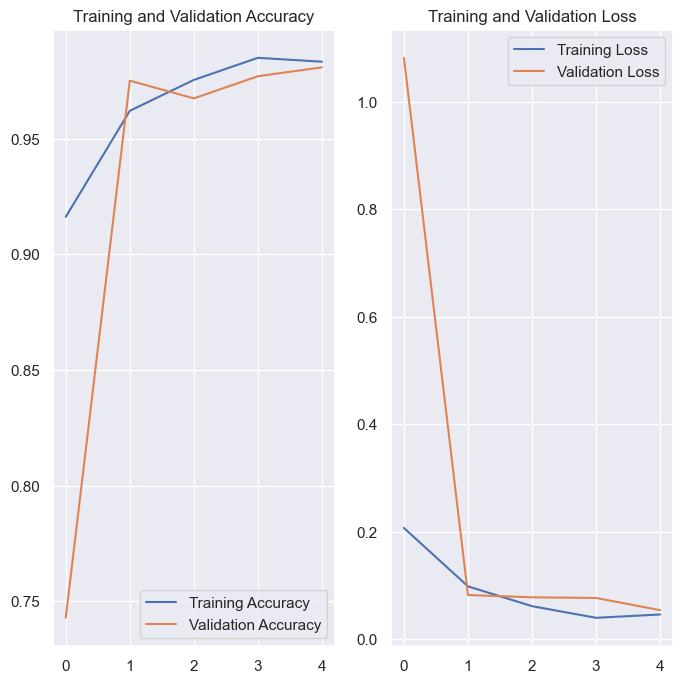

In [18]:
# Visualize the model performance on the training and validation set 

#Use history.history to obtain the model metrics

#Obtain model accuracy
acc = history.history['accuracy'] #Obtain the training accuracy
val_acc = history.history['val_accuracy'] # Obtain the validation accuracy

#Obtain the losses
loss = history.history['loss'] #Obtain the training loss
val_loss = history.history['val_loss'] #Obtain the validation loss

#Defining the epochs and epochs range
epochs = 5 #Number of epochs used for training
epochs_range = range(epochs) #Creating a range of epochs starting from 0

#Plotting the accuracy curves against the epoch range
plt.figure(figsize=(8, 8)) #Specifying the figure size
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') #Accuracy curve for training set
plt.plot(epochs_range, val_acc, label='Validation Accuracy')#Accuracy curve for validation set
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting the loss curves against the epoch range
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss') # Loss curve for training set
plt.plot(epochs_range, val_loss, label='Validation Loss') #Loss curve for validation set
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('1trainvalgraph_task2.png') #Saving the image
plt.show()

In [19]:
#####################

# Model evaluation

The extra detail to the font size had been inspired by https://stackoverflow.com/questions/59839782/confusion-matrix-font-size 

### Train data

148/148 ━━━━━━━━━━━━━━━━━━━━ 128s 861ms/step


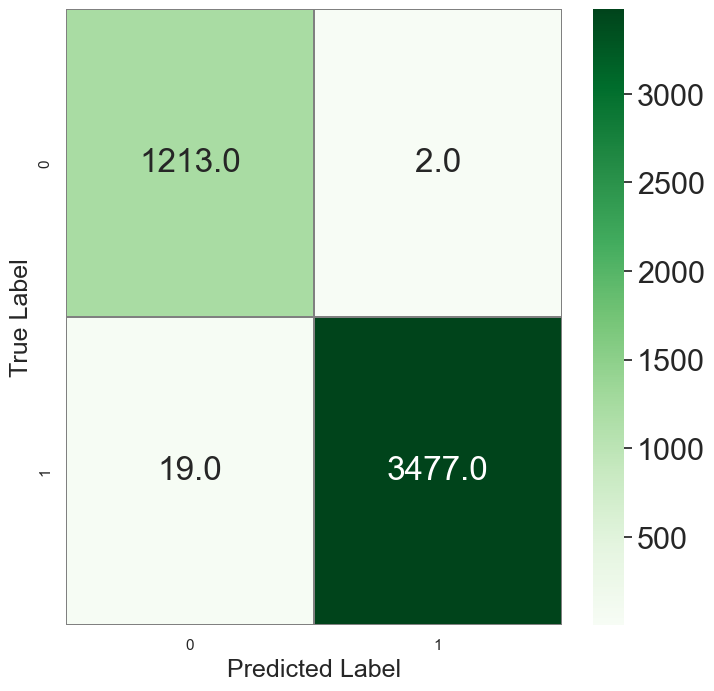

In [20]:
# confusion matrix using the train data

# Predict the values from the train dataset
Y_pred_train = model.predict(x_train)

#Convert training set predictions classes to one hot vectors 
Y_pred_classes_train = np.argmax(Y_pred_train,axis = 1) 

#Convert train observations to one hot vectors
Y_true_train = np.argmax(y_train,axis = 1) 

#Compute the confusion matrix using the true and predicted labels of the training set
confusion_mtx_train = confusion_matrix(Y_true_train, Y_pred_classes_train) 

#Plot the confusion matrix on the train data
f,ax = plt.subplots(figsize=(8, 8)) #Allocating the figure size
sns.set(font_scale=2.0) #Enlarging the size of the findings for easier visbility
#Plotting the confusion matrix using seaborn package, colour green and heatmap
sns.heatmap(confusion_mtx_train, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
#Defining the label font
label_font = {'size':'18'}
plt.xlabel("Predicted Label", fontdict=label_font)
plt.ylabel("True Label", fontdict=label_font)
plt.savefig('2trainCM_task2.png') #Saving the image
plt.show()

In [21]:
#Compare the true vs predicted labels using a classification report. 
print(classification_report(np.argmax(y_train, axis = 1),#Convert the predicted variable into categorical format
                            np.argmax(Y_pred_train, axis = 1))) #Convert the one-hot encoded variables into categorical

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1215
           1       1.00      0.99      1.00      3496

    accuracy                           1.00      4711
   macro avg       0.99      1.00      0.99      4711
weighted avg       1.00      1.00      1.00      4711



In [40]:
# Evaluate model accuracy on train set using the input images and features of train set.
train_loss, train_acc = model.evaluate(x_train,  #Training set images
                                       y_train,  #Training set features
                                       verbose = 1) #show an animated progress bar when running the code

print('Train set accuracy:', np.round(train_acc, 3))

148/148 ━━━━━━━━━━━━━━━━━━━━ 81s 547ms/step - accuracy: 0.9953 - loss: 0.0217
Train set accuracy: 0.996


### Validation data

17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 827ms/step


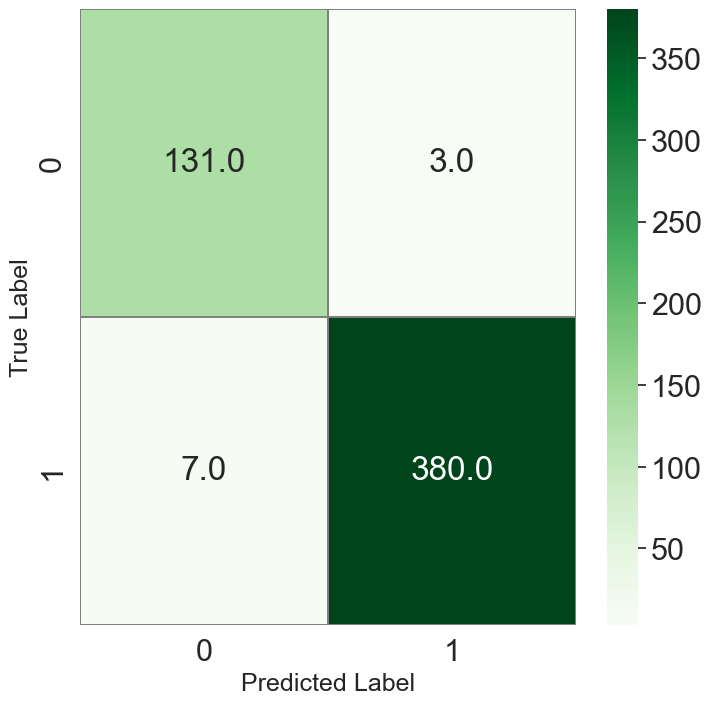

In [23]:
# confusion matrix using the validation data

# Predict the values from the validation dataset
Y_pred_val = model.predict(x_val)

# Convert predictions classes to one hot vectors 
Y_pred_classes_val = np.argmax(Y_pred_val,axis = 1) 

# Convert validation observations to one hot vectors
Y_true_val = np.argmax(y_val,axis = 1) 

# compute the confusion matrix using the true and predicted labels of the validation set
confusion_mtx_val = confusion_matrix(Y_true_val, Y_pred_classes_val) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=2.0) #Enlarging the size of the findings for easier visbility
#Plotting the confusion matrix using seaborn package, colour green and heatmap
sns.heatmap(confusion_mtx_val, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
label_font = {'size':'18'} #Defining the font size to be used on my axi
plt.xlabel("Predicted Label", fontdict=label_font)
plt.ylabel("True Label", fontdict=label_font)
plt.savefig('3validateCM_task2.png') #Saving the image
plt.show()

In [24]:
#Comparing the true vs predicted labels using a classification report.
print(classification_report(np.argmax(y_val, axis = 1), #Convert the predicted variable into categorical format
                            np.argmax(Y_pred_val, axis = 1)))#Convert the one-hot encoded variables into categorical

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       134
           1       0.99      0.98      0.99       387

    accuracy                           0.98       521
   macro avg       0.97      0.98      0.98       521
weighted avg       0.98      0.98      0.98       521



In [25]:
## Evaluate model accuracy on validation set using the input images and features of validation set.
val_loss, val_acc = model.evaluate(x_val,  #Validation set images 
                                   y_val, #Validation set features
                                   verbose = 1) #show an animated progress bar

print('Validation set accuracy:', np.round(val_acc, 3))

17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 867ms/step - accuracy: 0.9825 - loss: 0.0567
Validation set accuracy: 0.9808061122894287


### Test data

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 818ms/step


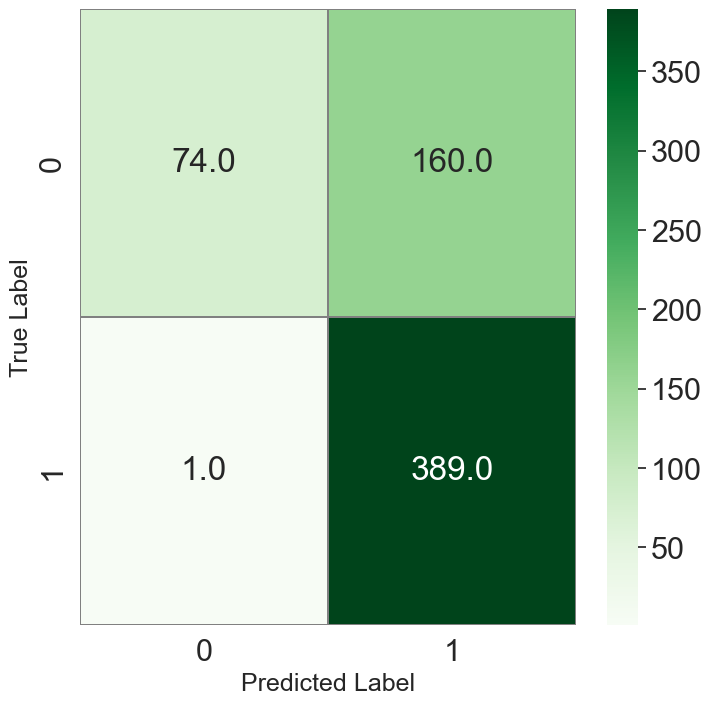

In [26]:
# confusion matrix using the test data
# Predict the values from the test dataset
Y_pred_test = model.predict(x_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes_test = np.argmax(Y_pred_test,axis = 1) 

# Convert test observations to one hot vectors
Y_true_test = np.argmax(y_test,axis = 1) 

# compute the confusion matrix using the true and predicted labels of the test set
confusion_mtx_test = confusion_matrix(Y_true_test, Y_pred_classes_test) 

# plot the confusion matrix for the test set
f,ax = plt.subplots(figsize=(8, 8)) #Defining my figure size
sns.set(font_scale=2.0) #Enlarging the size of the findings for easier visbility
#Plotting the confusion matrix using seaborn package, colour green and heatmap
sns.heatmap(confusion_mtx_test, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
label_font = {'size':'18'} #Defining the font size to be used on my axi
plt.xlabel("Predicted Label", fontdict=label_font)
plt.ylabel("True Label", fontdict=label_font)
plt.savefig('4testCM_task2.png') #Saving the image
plt.show()

In [27]:
#Comparing the true vs predicted labels using a classification report for the test set.
print(classification_report(np.argmax(y_test, axis = 1), #Convert the predicted variable into categorical format
                            np.argmax(Y_pred_test, axis = 1)))#Convert the one-hot encoded variables into categorical

              precision    recall  f1-score   support

           0       0.99      0.32      0.48       234
           1       0.71      1.00      0.83       390

    accuracy                           0.74       624
   macro avg       0.85      0.66      0.65       624
weighted avg       0.81      0.74      0.70       624



In [28]:
#Evaluate model accuracy on test set using the input images and features of test set.
test_loss, test_acc = model.evaluate(x_test,  #Test images
                                     y_test,  #The test features
                                     verbose=1) #show an animated progress bar

print('Test set accuracy:', test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 836ms/step - accuracy: 0.7291 - loss: 1.2331
Test set accuracy: 0.7419871687889099


# Image predictions

This code is influenced by Tensorflow: https://www.tensorflow.org/tutorials/keras/classification 

Assuming that i represents a random index image of choice

Remember that 0 represents normal and 1 represents Pneumonia

In [99]:
###########################################

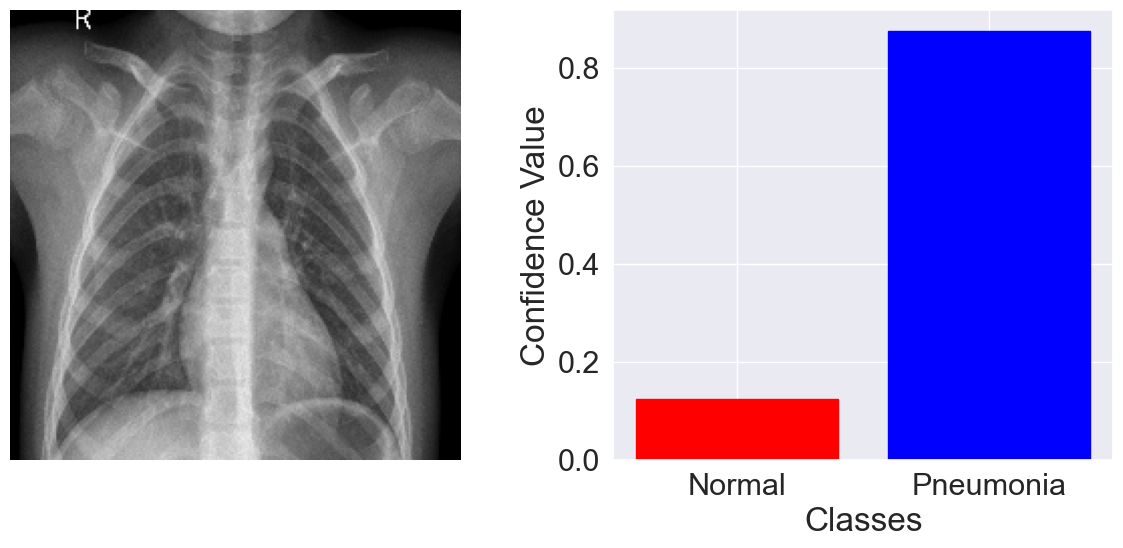

In [107]:
i = 1  # Index of the image to visualize

#Defining the figure size
plt.figure(figsize=(12, 6))

# Create a figure with two subplots
# Subplot (1, 2, 1) for displaying the image
plt.subplot(1, 2, 1)
plt.imshow(x_test[i])
plt.axis('off')
#plt.title('Image')

# Subplot (1, 2, 2) for plotting the bars
plt.subplot(1, 2, 2)

# Plotting the bars for predicted and true classes
bars = plt.bar(['Normal', 'Pneumonia'], Y_pred_test[i]);
bars[Y_pred_classes_test[i]].set_color('blue') #Colour blue for the predicted class
bars[Y_true_test[i]].set_color('red') #Colour red for the actual class 

#Adding labels and legend
plt.xlabel('Classes')
plt.ylabel('Confidence Value')
#plt.title('The Predicted and True Classes')

plt.tight_layout()
plt.savefig('1exampleimg_task2.png')
plt.show()

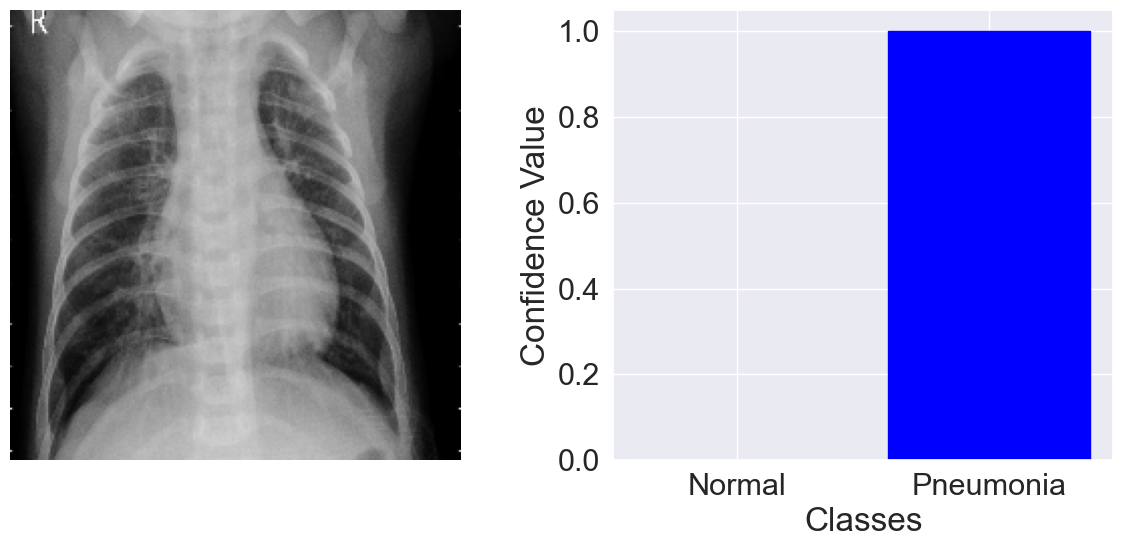

In [108]:
i = 10  # Index of the image to visualize

#Defining the figure size
plt.figure(figsize=(12, 6))

# Create a figure with two subplots
# Subplot (1, 2, 1) for displaying the image
plt.subplot(1, 2, 1)
plt.imshow(x_test[i])
plt.axis('off') #Turning of the axis

# Subplot (1, 2, 2) for plotting the bars
plt.subplot(1, 2, 2)

# Plotting the bars for predicted and true classes
bars = plt.bar(['Normal', 'Pneumonia'], Y_pred_test[i]);
bars[Y_true_test[i]].set_color('red') #Colour red for the actual class  
bars[Y_pred_classes_test[i]].set_color('blue') #Colour blue for the predicted value

# Adding labels and legend
plt.xlabel('Classes')
plt.ylabel('Confidence Value')

plt.tight_layout()
plt.savefig('2exampleimg_task2.png')
plt.show()

# Video 
### Looping through the directory

The code for showing the images and their corresponding predictions has been inspired by https://www.tensorflow.org/tutorials/keras/classification

Attention: The code for looping through the test directory and creating new labelled images takes approximately an 2hours to run

In [ ]:
#################################

In [33]:
#Defining a function that stores the images with their labels.
#Visualize the true and predicted image labels from the test directory using this function
def outImg(name, i): #Input is the name of the file and its index
    nameArray = ['Normal', 'Pneumonia'] # 0 for Normal and 1 for Pneumonia
    plt.imshow(x_test[i]) #Display the image to corresponding index from the test set
    plt.axis('off') #Removes the axis of images
    truey = np.argmax(y_test, axis = 1) #Storing the true class labels to this variable
    #Adding text to the plot indicating the true label of the image
    txt1 = plt.text(90, 235, 'True: ' + str(nameArray[truey[i]])) #truey[i] give the true label
    #Adding text to the plot indicating the predicted label of the image
    txt2 = plt.text(90, 250, 'Predicted: ' + str(nameArray[np.argmax(Y_pred_test[i])])) #np.argmax(Y_pred_test[i]) gives the corresponding predicted label
    plt.savefig(name, ) #Saving the image file with a specified name
    #Since the names overlapped, these lines were written to hide the label and conclusively have 1 clear label. 
    txt1.set_visible(False) 
    txt2.set_visible(False)

In [ ]:
# This code takes long to run
#Iterating through all images in the test directory
for i in range(len(x_test)):
    name ='Pred/' + str(i) + '.png' #Downloading all the predicted images as 'png' images with file name
    outImg(name, i) #Passing the constructed name in the above loop

In [ ]:
############################

## Flythrough video from Pred-directory
The code for creating the video has been modified from: https://stackoverflow.com/questions/44947505/how-to-make-a-movie-out-of-images-in-python

In [42]:
#Obtain the directory containing the predicted_test CXR images 
pwd = os.getcwd()#path working directory = pwd
pred_dir = os.path.join(pwd, 'Pred')

# Getting a list of all image files in the directory
image_files = [f for f in os.listdir(pred_dir) if f.endswith(".png")]

#Setting the video resolution 
width, height = 512, 512  #Downscaling the original images to this reasonable size 

#Set the video motion-jpeg codec and frame rate
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')  #4-character code of codec used to compress the frames 

framerate = 0.5 # Approximately 1 second per image

# Create a VideoWriter object
output_file = "test_predictionsvideo_task3.avi"  # Assigning a file name for the output
video_writer = cv2.VideoWriter(output_file, fourcc, framerate, (width, height), False) #Is colour set to false as these are grayscale images

# Loop through the image files and write each frame to the video
for image_file in image_files:
    image_path = os.path.join(pred_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    image = cv2.resize(image, (width, height))  # Resize the image if needed
    video_writer.write(image)
    # Release the video writer and close all windows
video_writer.release()

In [ ]:
############################

# Save model

In [43]:
model.save("CXR_Pneumonia_model.h5")
#ignore the warning